In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
E1=1 #normalización
V=1 #volumen

In [3]:
def En(nx,ny): #Cálculo de autoenergías
    return E1*(nx**2+ny**2)

In [4]:
EE=[]
nmax=120
######## ENERGÍAS DEL SISTEMA############
for i in range (1, nmax+1):
    for j in range (1,nmax+1):
        if i**2+j**2<=nmax**2:
            Ei=En(i,j)
            EE.append(Ei)
EE.sort()
E=np.asarray(EE)
#print (E) #energías
print (E.size) #número de energías usadas

11186


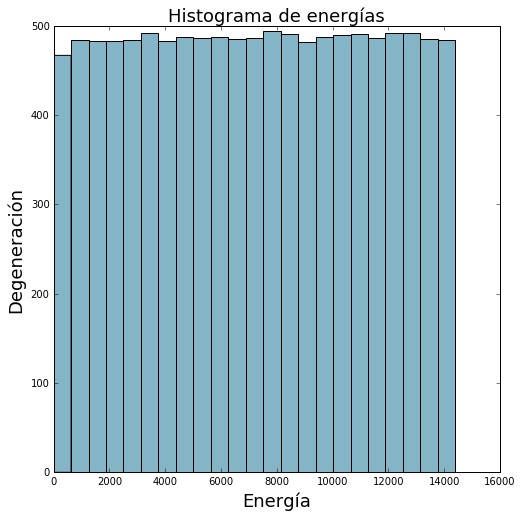

In [5]:
plt.figure(figsize=(8,8))  
plt.hist(E, bins='auto',color = '#83b5c7')  # HISTOGRAMA DE ENERGÍAS
plt.title("Histograma de energías", fontsize=18)
plt.ylabel('Degeneración',fontsize=18)
plt.xlabel('Energía',fontsize=18)
plt.savefig("caja-cuadrada-histograma.eps", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', format='eps',
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None)

plt.show()

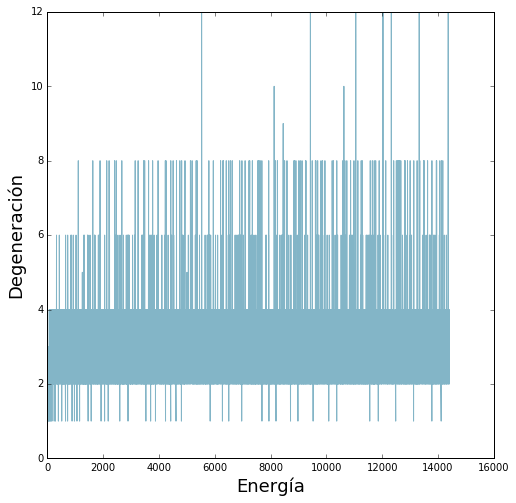

3795


In [28]:
#E=np.asarray(E)
End=np.unique(E) #arreglo de los niveles de energía(sin degeneración)
NE=End.size #número de energías diferentes

d=np.array(np.unique(E, return_counts=True)) #arrego de energías y degeneración de cada nivel
X=[] ##########Arreglo donde quedarán los niveles de energía
Y=[] ##########Arrreglo donde quedará la degeneración de ada nivel
for i in range (0,NE):
    energy=d[0,i]
    degeneracy=d[1,i]
    X.append(energy)
    Y.append(degeneracy)
#print(Deg)

plt.figure(figsize=(8,8)) 
plt.plot(X,Y,color = '#83b5c7')
plt.ylabel('Degeneración', fontsize=18)
plt.xlabel('Energía', fontsize=18)

plt.savefig("caja-cuadrada-degeneracion.eps", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', format='eps',
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None)

plt.show()
print (NE)
#print(X,Y)

In [8]:
n=[]   ####Arreglo del número cumulativo de estados 
Nmax=E.size
for i in range(0,Nmax):
    n.append(i+1)

def teorN(x):
    return(np.pi*x)/4

E_teo = np.linspace(0, 14000, 14000)
N_teo = teorN(E_teo)

#plt.figure(figsize=(8,8)) 
#plt.plot(E_teo, N_teo, label='Curva teórica', color='k')

#plt.plot(E,n, color = '#83b5c7', label='Curva por método numérico')
#plt.ylabel('Número acumulativo de estados', fontsize=18)
#plt.xlabel('Energía', fontsize=18)
#plt.legend(loc='upper left', fontsize=18)
#plt.savefig("caja-cuadrada-numero1.eps", dpi=None, facecolor='w', edgecolor='w',
        #orientation='portrait', format='eps',
       # #transparent=False, bbox_inches='tight', pad_inches=0.1,
        #rameon=None)
#plt.show()

In [13]:
########### número cumulativo de estados teniendo en cuenta únicamente el índice más alto para cada energía
NN=[]
for j in range(0, Nmax):
    Ej=E[j]
    for i in range (0, Nmax):
        Ei=E[i]
        if Ei==Ej:
            a=i+1 #los indices de los arrays corren desde 0 y se necesita n=1,2,3...
    NN.append(a) #agrega el n más alto de cada E
N=np.asarray(NN)
N=np.unique(N)
#print(NN)
#print(End)




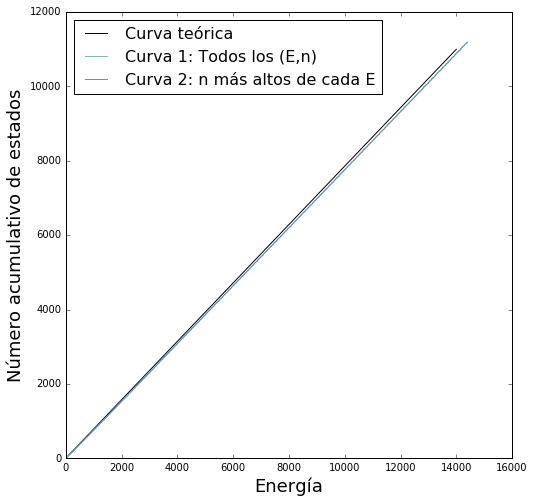

In [29]:
plt.figure(figsize=(8,8)) 
plt.plot(E_teo, N_teo, label='Curva teórica', color='k')

plt.ylabel('Número acumulativo de estados', fontsize=18)
plt.xlabel('Energía', fontsize=18)
plt.plot(E,n, color = '#83b5c7', label='Curva 1: Todos los (E,n)')

plt.plot(End,N, color = '#6a92a0', label='Curva 2: n más altos de cada E' )
plt.legend(loc='upper left', fontsize=16)
plt.savefig("caja-cuadrada-numero.eps", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', format='eps',
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None)
plt.show()

In [15]:
eps=500
g=[]
    ########CALCULO DE LA DENSIDAD DE ESTADOS POR DIFERENCIACION HACIA ADELANTE PARA LOS n MAS ALTOS
for i in range (1,NE-eps):
    ener=End[i+eps]
    ener2=End[i]
    delta=ener-ener2
    n1=N[i+eps]
    n2=N[i]
    #print(n1,n2,delta)
    gi=(n1-n2)/delta
    g.append(gi)

#print(g)
#plt.plot(End,g)
#plt.show()

In [16]:
g=np.asarray(g)
G=g.size
#print(G,NE)
Ener=[]
##########CAMIANDO EL TAMAÑO DE E PARA QUE SEA IGUAL AL DE G
for i in range (0,G):
    Eneri=End[i]
    Ener.append(Eneri)





In [24]:
eps=1200
g2=[]
    ########CALCULO DE LA DENSIDAD DE ESTADOS POR DIFERENCIACION HACIA ADELANTE PARA TODOS LOS (E,n)
for i in range (0,Nmax-eps):
    ener=E[i+eps]
    ener2=E[i]
    delta=ener-ener2
    n1=n[i+eps]
    n2=n[i]
    #print(n1,n2,delta)
    g2i=(n1-n2)/delta
    g2.append(g2i)

g2=np.asarray(g2)
G2=g2.size
Ener2=[]
##########CAMIANDO EL TAMAÑO DE E PARA QUE SEA IGUAL AL DE G
for i in range (0,G2):
    Eneri2=E[i]
    Ener2.append(Eneri2)


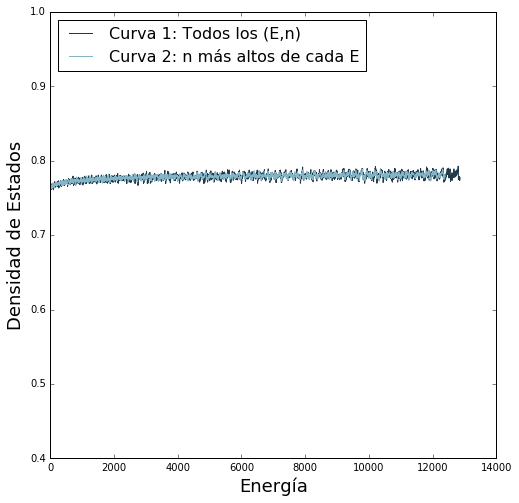

In [27]:
plt.figure(figsize=(8,8)) 
plt.plot(Ener2,g2, color = '#213b4c', label='Curva 1: Todos los (E,n)')
plt.plot(Ener,g, color = '#83b5c7', label='Curva 2: n más altos de cada E' )
plt.ylabel('Densidad de Estados', fontsize=18)
plt.ylim(0.4, 1) 
plt.xlabel('Energía', fontsize=18)
plt.legend(loc='upper left', fontsize=16)
#plt.plot(x,(np.pi*x**(1/2))/4)
plt.savefig("caja-cuadrada-densidad.eps", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', format='eps',
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None)
plt.show()